In [51]:
import seaborn as sns
import numpy as np
import pandas as pd
import toml
import matplotlib.pyplot as plt
with open('config.toml', 'r', encoding='utf-8') as toml_file:
    config = toml.load(toml_file)

model_names = config['model_names']
alter_names = model_names.copy() # Create a copy to modify

for i, name in enumerate(alter_names):
    if name in config['alternative_names']: 
        alter_names[i] = config['alternative_names'][name]

In [52]:
def calculate_half_matrix(matrix):
    half_matrix = np.zeros_like(matrix)
    for i in range(len(model_names)):
        for j in range(len(model_names)):
            half_matrix[i, j] = 0.5 * (matrix[i, j] + matrix[j, i])
            half_matrix[j, i] = half_matrix[i, j]
    return half_matrix
def plot_matrix(matrix, model_names, mask=False, title="Average Answer Accuracy"):
    plt.figure(figsize=(10, 10))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    if mask:
        half_matrix = calculate_half_matrix(matrix)
        mask = np.triu(np.ones_like(matrix, dtype=bool))
        plt.figure(figsize=(10, 10))
        sns.heatmap(half_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, xticklabels=model_names, yticklabels=model_names)
    else:
        sns.heatmap(matrix, annot=True, fmt=".2f", cmap=cmap, xticklabels=model_names, yticklabels=model_names)
    plt.title(title)
    plt.xlabel("Models")
    plt.ylabel("Models")
    plt.show()

In [37]:
accuracy_matrix = np.load('accuracy_matrix.npy')
print(accuracy_matrix.shape)
print(np.unique(accuracy_matrix))

(8, 8, 130)
[0.   0.25 0.5  0.75 1.  ]


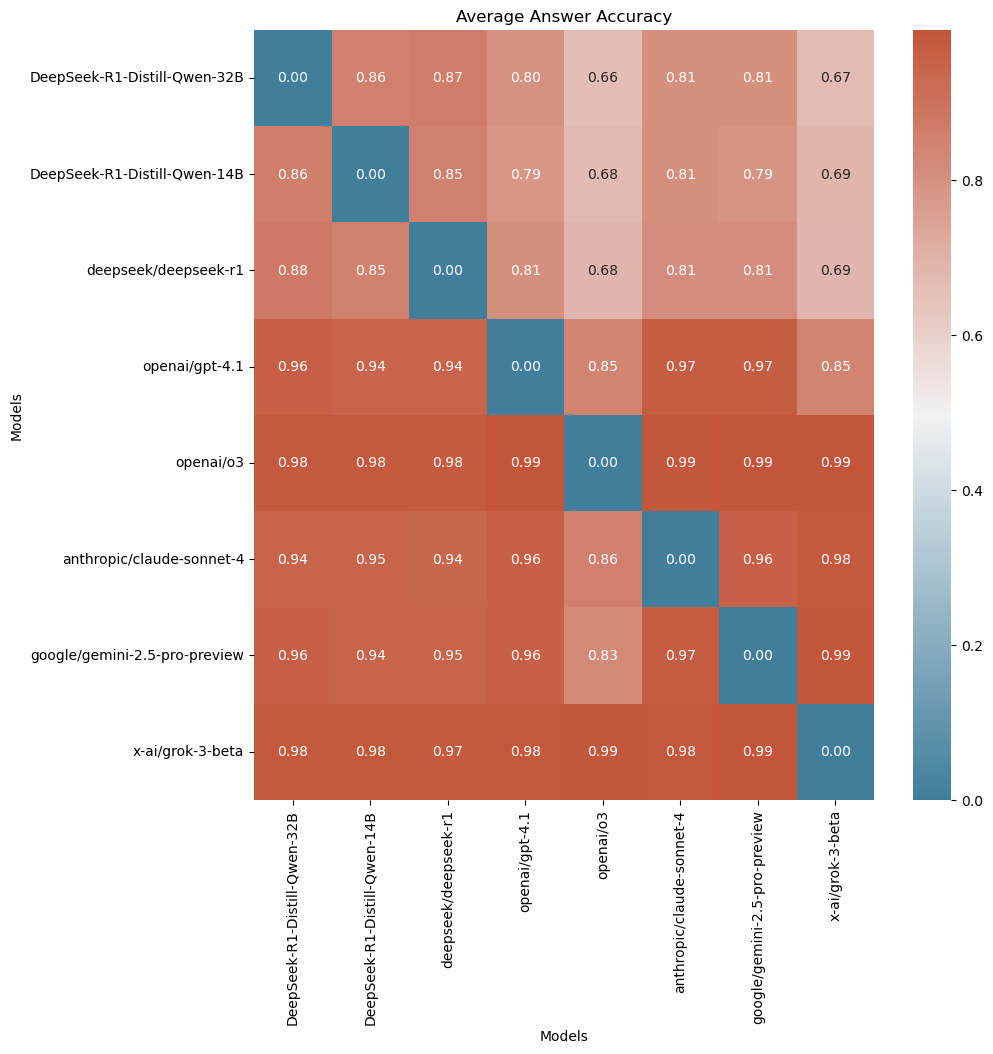

In [53]:
accuracy_mean = np.mean(accuracy_matrix, axis=2)
plot_matrix(accuracy_mean, alter_names)

<Figure size 1000x1000 with 0 Axes>

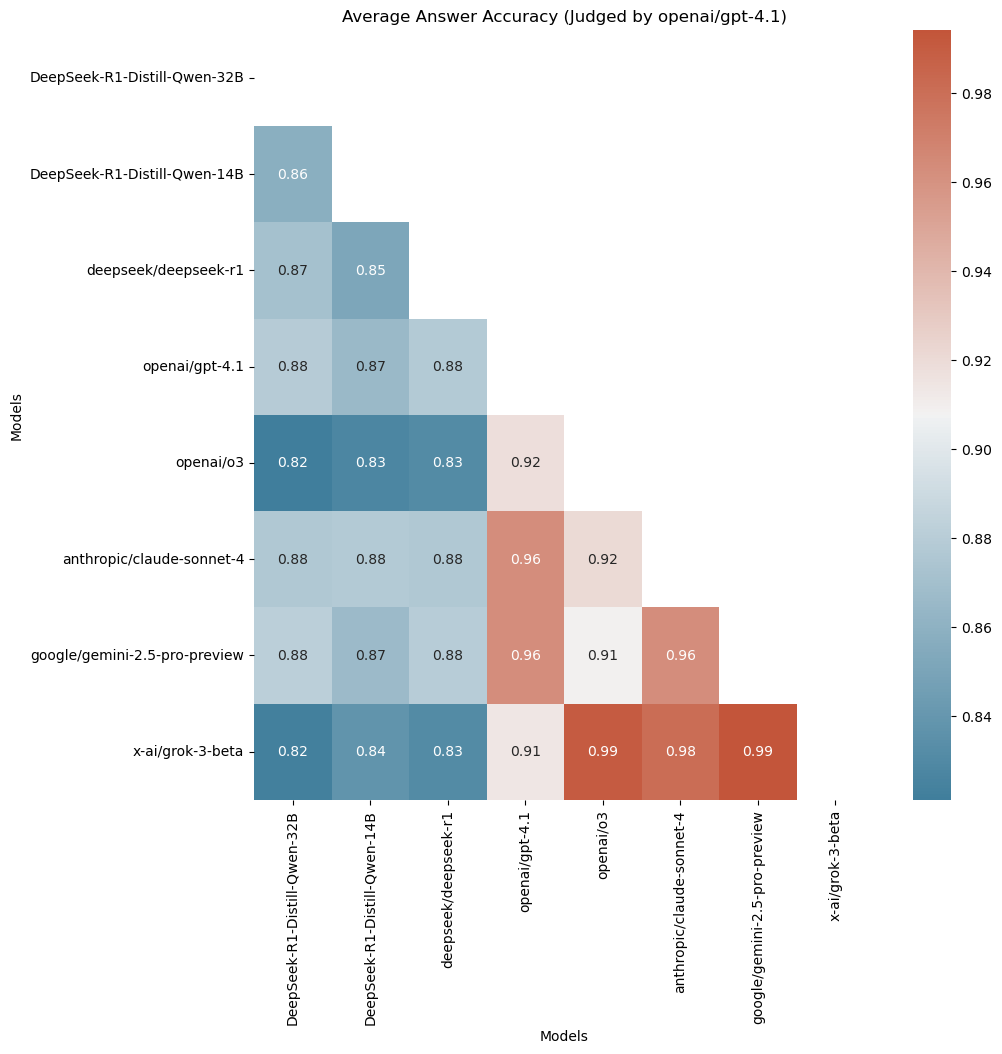

In [66]:
plot_matrix(accuracy_mean, alter_names, mask=True, title="Average Answer Accuracy (Judged by openai/gpt-4.1)")

In [38]:
# Average accuracy among different models
average_accuracy = np.mean(accuracy_matrix, axis=1)
print(average_accuracy.shape)

(8, 130)


In [40]:
average_accuracy_df = pd.DataFrame(columns=['Inference model', 'Question Id', 'Accuracy'])
average_accuracy_records = []
for i, model in enumerate(alter_names):
    for j in range(average_accuracy.shape[1]):
        average_accuracy_records.append({
            'Inference model': alter_names[i],
            'Question Id': j,
            'Accuracy': average_accuracy[i, j]
        })
average_accuracy_df = pd.DataFrame(average_accuracy_records)
average_accuracy_df.head()

,Inference model,Question Id,Accuracy
0,DeepSeek-R1-Distill-Qwen-32B,0,0.62500
1,DeepSeek-R1-Distill-Qwen-32B,1,0.34375
2,DeepSeek-R1-Distill-Qwen-32B,2,0.43750
3,DeepSeek-R1-Distill-Qwen-32B,3,0.56250
4,DeepSeek-R1-Distill-Qwen-32B,4,0.84375


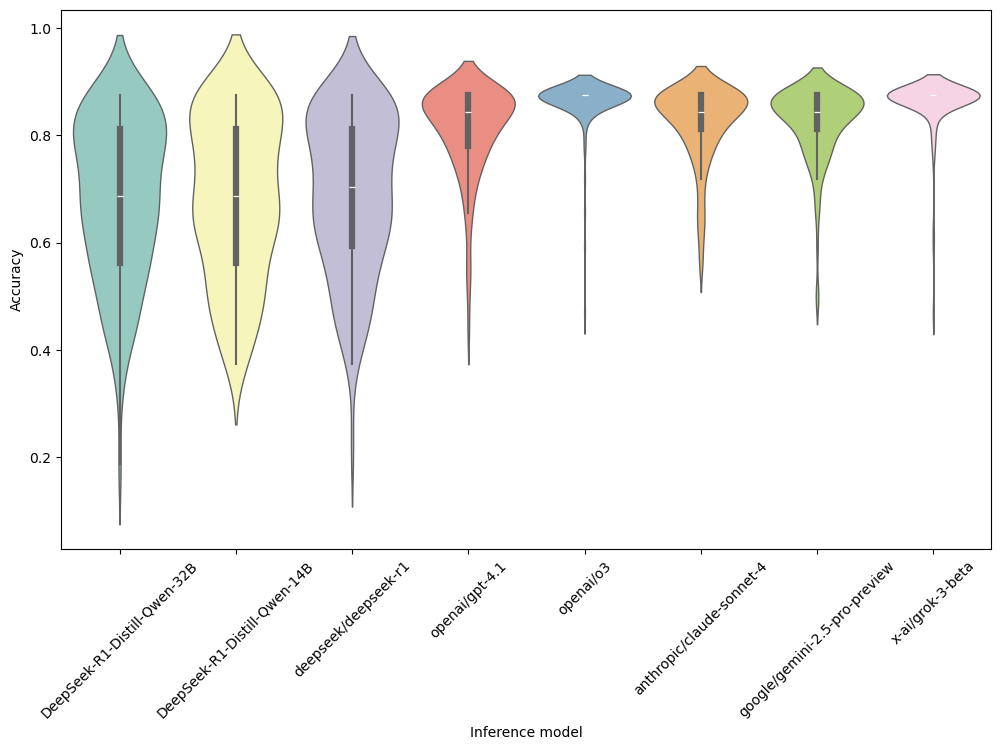

In [56]:
f, ax = plt.subplots(figsize=(12, 7))
sns.violinplot(x='Inference model', y='Accuracy', hue='Inference model', data=average_accuracy_df, linewidth=1, palette="Set3")
plt.xticks(rotation=45)
plt.show()

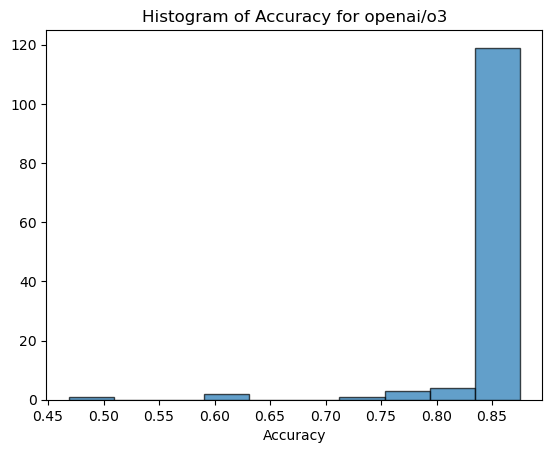

In [42]:
model_index = 4  # Index for Model 4
plt.hist(average_accuracy[i,:], alpha=0.7, edgecolor='black')
plt.xlabel('Accuracy')
plt.title(f'Histogram of Accuracy for {alter_names[model_index]}')
plt.show()

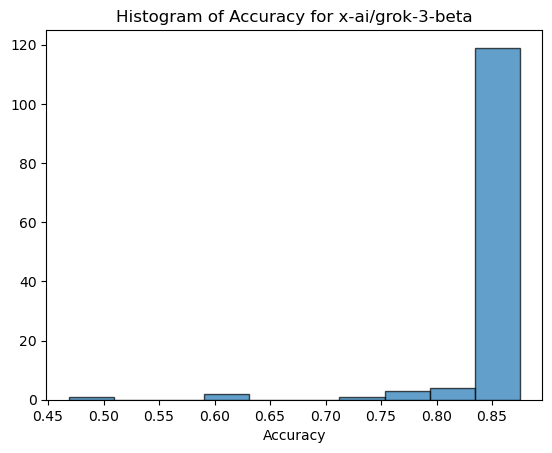

In [43]:
model_index = 7  # Index for Model 4
plt.hist(average_accuracy[i,:], alpha=0.7, edgecolor='black')
plt.xlabel('Accuracy')
plt.title(f'Histogram of Accuracy for {alter_names[model_index]}')
plt.show()

In [45]:
average_rating = np.mean(accuracy_matrix, axis=0)
print(average_rating.shape)
average_rating_df = pd.DataFrame(columns=['Reference model', 'Question Id', 'Rating'])
average_rating_records = []
for i, model in enumerate(alter_names):
    for j in range(average_rating.shape[1]):
        average_rating_records.append({
            'Reference model': alter_names[i],
            'Question Id': j,
            'Rating': average_rating[i, j]
        })
average_rating_df = pd.DataFrame(average_rating_records)
average_rating_df.head()

(8, 130)


,Reference model,Question Id,Rating
0,DeepSeek-R1-Distill-Qwen-32B,0,0.87500
1,DeepSeek-R1-Distill-Qwen-32B,1,0.65625
2,DeepSeek-R1-Distill-Qwen-32B,2,0.43750
3,DeepSeek-R1-Distill-Qwen-32B,3,0.81250
4,DeepSeek-R1-Distill-Qwen-32B,4,0.81250


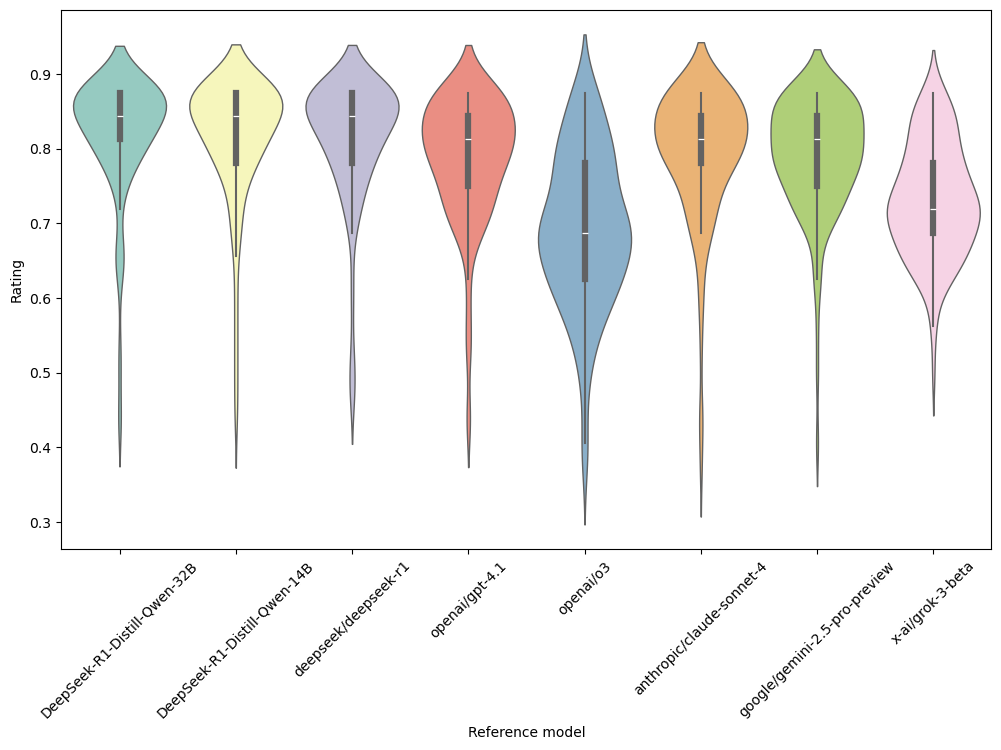

In [55]:
f, ax = plt.subplots(figsize=(12, 7))
sns.violinplot(x='Reference model', y='Rating', hue='Reference model', data=average_rating_df, linewidth=1, palette="Set3")
plt.xticks(rotation=45)
plt.show()

In [67]:
correctness_matrix = np.load('deepeval_correctness_matrix.npy')

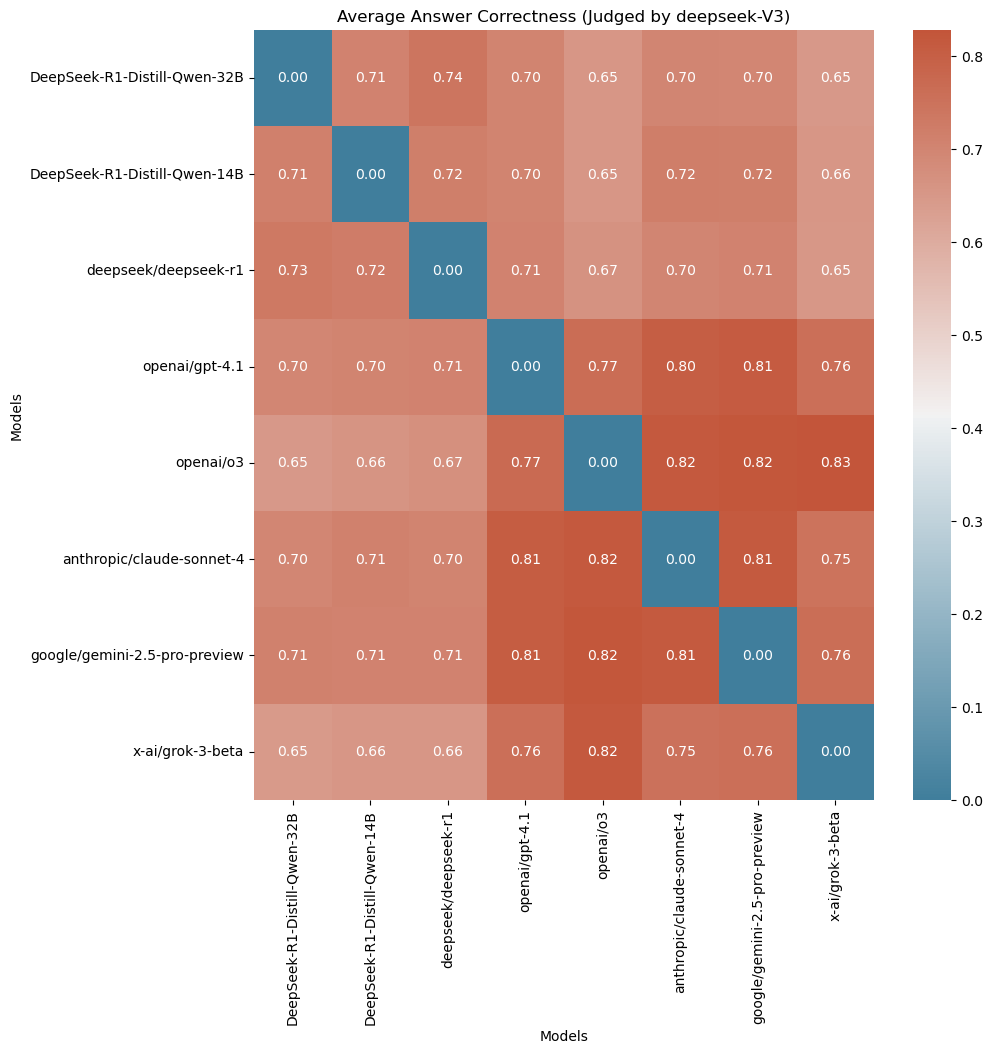

In [68]:
correctness_mean = np.mean(correctness_matrix, axis=2)
plot_matrix(correctness_mean, alter_names, title="Average Answer Correctness (Judged by deepseek-V3)")

In [59]:
mean_correctness = np.mean(correctness_matrix, axis=1)
print(mean_correctness.shape)
mean_correctness_df = pd.DataFrame(columns=['Inference model', 'Question Id', 'Correctness'])
mean_correctness_records = []
for i, model in enumerate(alter_names):
    for j in range(mean_correctness.shape[1]):
        mean_correctness_records.append({
            'Inference model': alter_names[i],
            'Question Id': j,
            'Correctness': mean_correctness[i, j]
        })
mean_correctness_df = pd.DataFrame(mean_correctness_records)
mean_correctness_df.head()

(8, 130)


,Inference model,Question Id,Correctness
0,DeepSeek-R1-Distill-Qwen-32B,0,0.4250
1,DeepSeek-R1-Distill-Qwen-32B,1,0.5250
2,DeepSeek-R1-Distill-Qwen-32B,2,0.4375
3,DeepSeek-R1-Distill-Qwen-32B,3,0.4500
4,DeepSeek-R1-Distill-Qwen-32B,4,0.4875


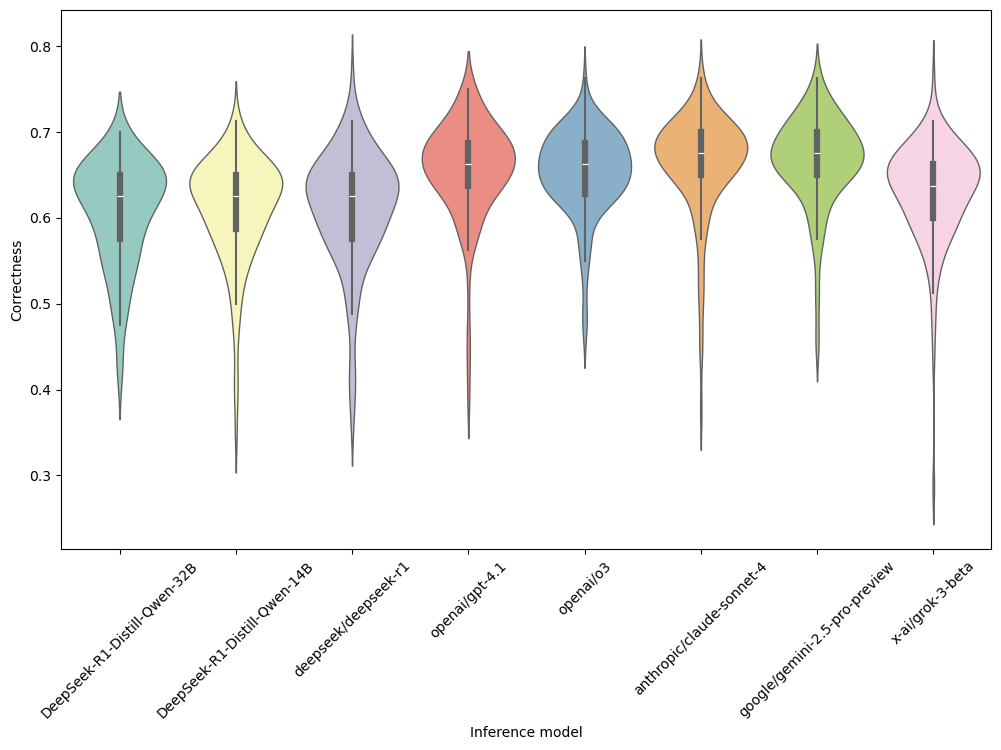

In [69]:
f, ax = plt.subplots(figsize=(12, 7))
sns.violinplot(x='Inference model', y='Correctness', hue='Inference model', data=mean_correctness_df, linewidth=1, palette="Set3")
plt.xticks(rotation=45)
plt.show()

In [61]:
mean_rating = np.mean(correctness_matrix, axis=0)
print(mean_rating.shape)
mean_rating_df = pd.DataFrame(columns=['Reference model', 'Question Id', 'Rating'])
mean_rating_records = []
for i, model in enumerate(alter_names):
    for j in range(mean_rating.shape[1]):
        mean_rating_records.append({
            'Reference model': alter_names[i],
            'Question Id': j,
            'Rating': mean_rating[i, j]
        })
mean_rating_df = pd.DataFrame(mean_rating_records)
mean_rating_df.head()

(8, 130)


,Reference model,Question Id,Rating
0,DeepSeek-R1-Distill-Qwen-32B,0,0.5500
1,DeepSeek-R1-Distill-Qwen-32B,1,0.4500
2,DeepSeek-R1-Distill-Qwen-32B,2,0.2500
3,DeepSeek-R1-Distill-Qwen-32B,3,0.5375
4,DeepSeek-R1-Distill-Qwen-32B,4,0.5875


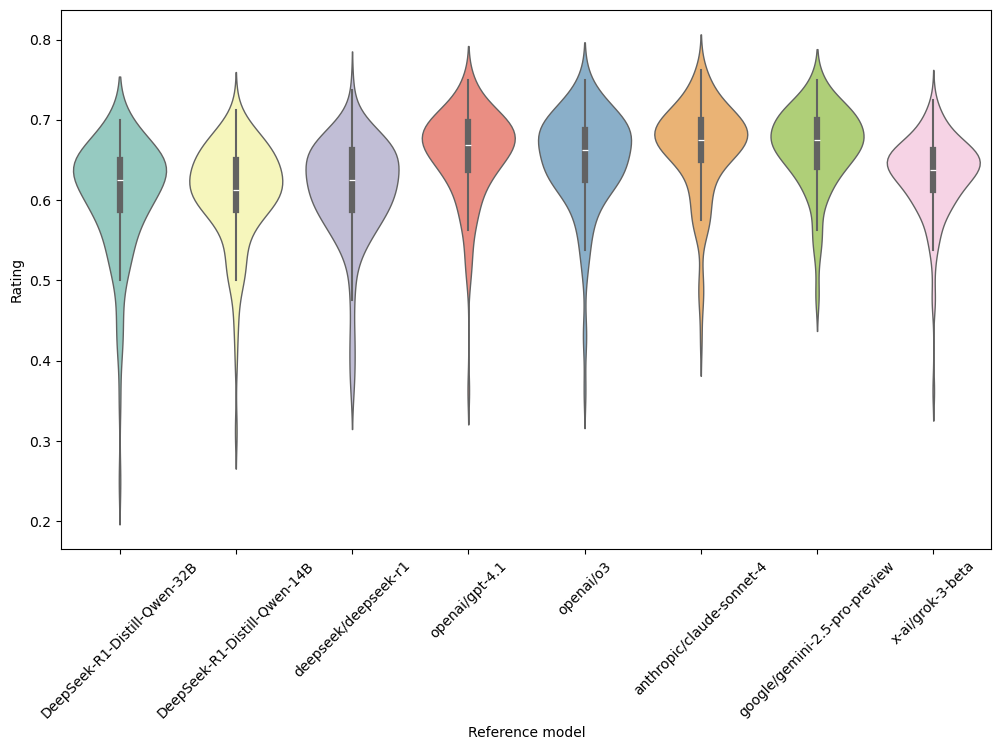

In [64]:
f, ax = plt.subplots(figsize=(12, 7))
sns.violinplot(x='Reference model', y='Rating', hue='Reference model', data=mean_rating_df, linewidth=1, palette="Set3")
plt.xticks(rotation=45)
plt.show()